# Anna Beathriz C de Mauro

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
import pandas as pd

# 1) a)

In [9]:
amostra = [0.8411, 0.8191, 0.8182, 0.8125, 0.8580, 0.8532, 0.8483,
           0.8276, 0.8042, 0.8730, 0.8282, 0.8359, 0.8750, 0.7983, 0.8660]
soma = sum(amostra)
media = soma/15
print('A média é', media)
s2 = 0
for i in amostra:
    s2+= ((i-media)**2)/(15-1)
print("s2 =", s2)
print('Portanto, s =',(s2)**(1/2))

A média é 0.83724
s2 = 0.0006030511428571423
Portanto, s = 0.024557099642611345


# c)

In [14]:
tobs = (media - 0.82)/(0.02456/(15**(1/2)))
print('tobs =',tobs)

tobs = 2.71865769090456


# f)

In [25]:
tcrit = stats.t.ppf((1-0.05),df=14)
valorp = 1-stats.t.cdf(tobs,df=14)
print('tcrit=', tcrit, 'valorp=',valorp)

tcrit= 1.76131013577 valorp= 0.00831860311101


# 2)

In [31]:
amostra = [23.01, 22.22, 22.04, 22.62,22.59]
soma = sum(amostra)
media = soma/5
s2 = 0
for i in amostra:
    s2+= ((i-media)**2)/(5-1)
s = s2**(1/2)
tobs = (media - 22.5)/(s/(5**(1/2))) 
valorp = 2*stats.t.cdf(tobs,df=4)
print('valorp =', valorp)

valorp = 0.982270750384


In [32]:
tcrit = stats.t.ppf((1-0.025),df = 5-1)
print('tcriticos são',-tcrit,tcrit)

tcriticos são -2.7764451052 2.7764451052


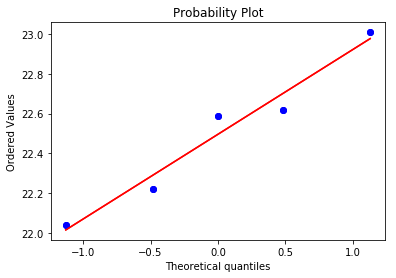

In [35]:
dados = pd.Series(amostra)
stats.probplot(dados, dist='norm', plot=plt)
plt.show()

# 3)

In [43]:
dados = [ 129.26, 204.49, 116.89, 106.4 , 95.3 , 123.35, 92.3 , 300.02, 264.34, 168.27, 80.02, 117.96,
         117.73, 370.47, 462.59, 92.58, 258.52, 82.59]
dados = pd.Series(dados)
n = len(dados)
#Estimativas
xbarra = np.mean(dados)
dp = np.std(dados,ddof=1)

print("Média: ", xbarra)
print("Desvio padrão amostral: ", dp)


Média:  176.83777777777777
Desvio padrão amostral:  110.95287190067022


In [44]:
#Construção das Reamostragens da amostra mestre (dados) com reposição

xbarra_Boot = []

B = 10000
for i in range(B):
    # Gera uma reamostra dos dados _com_ reposição
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.mean(amostra)
    xbarra_Boot.append(xbarraB)
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
#Confiança = 0.95

Lim_inf = np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 130.743111111
Limite superior: 229.565763889


In [46]:
#Construção das Reamostragens da amostra mestre (dados) com reposição

xbarra_Boot = []

B = 10000
for i in range(B):
    # Gera uma reamostra dos dados _com_ reposição
    amostra = np.random.choice(dados, size=n, replace=True)
    xbarraB = np.std(amostra,ddof=1)
    xbarra_Boot.append(xbarraB)
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
#Confiança = 0.95

Lim_inf = np.percentile(xbarra_Boot, 2.5)
Lim_sup = np.percentile(xbarra_Boot, 97.5)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 59.4306781645
Limite superior: 143.47204072


Está dentro dos limites